# Importing the Data

installing a library that will help us to do auto-EDA (Exploratory Data Analysis)

In [304]:
pip install sweetviz


In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv


data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#AUTO-EDA

                                             |          | [  0%]   00:00 -> (? left)


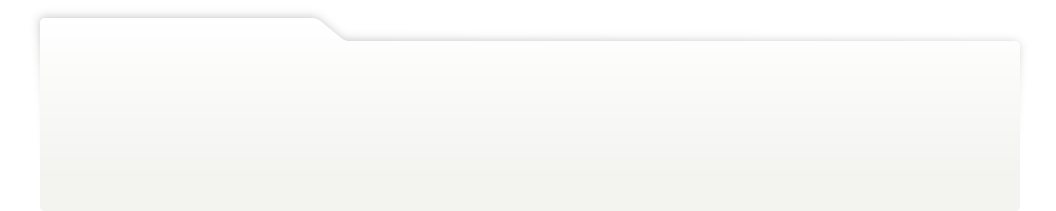
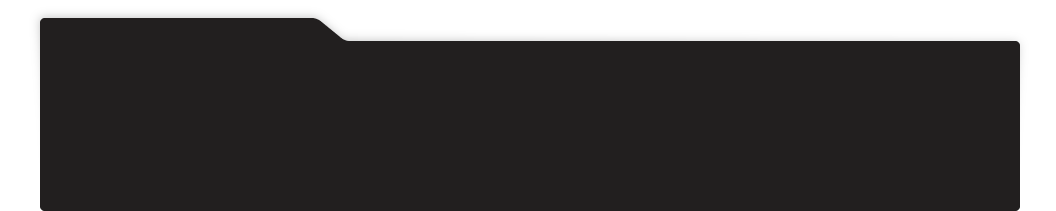
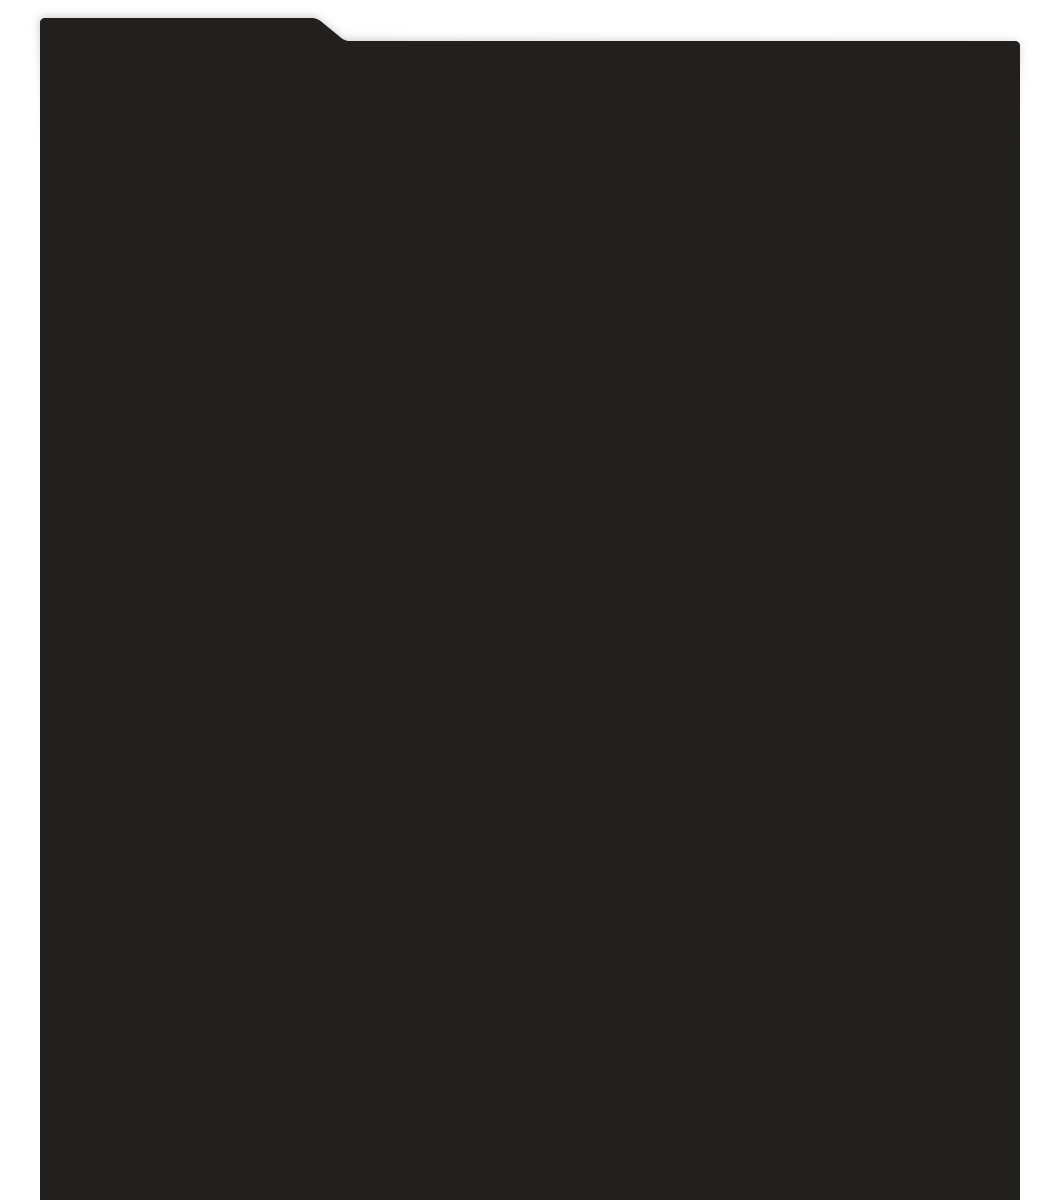
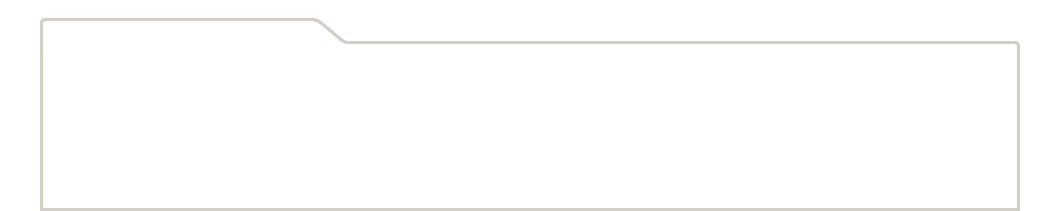
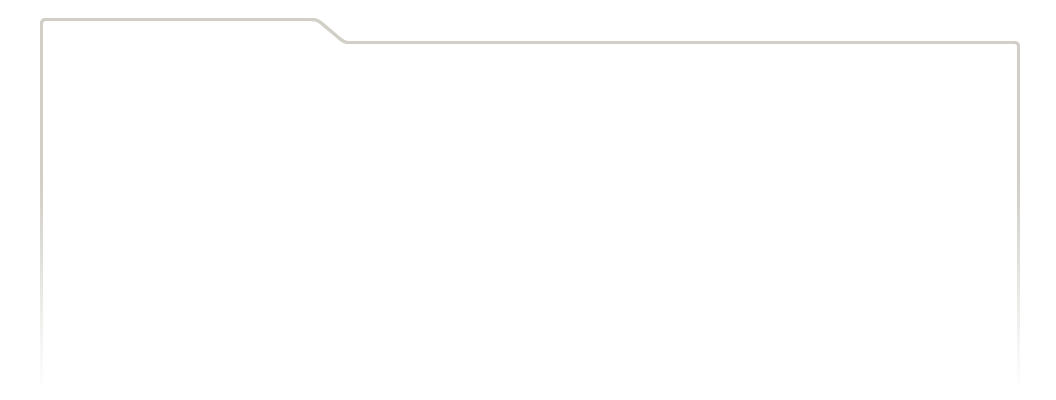
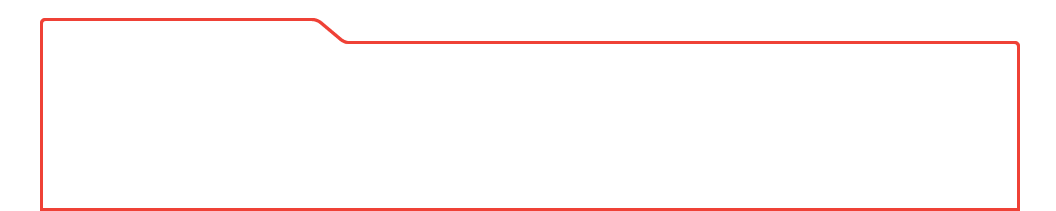
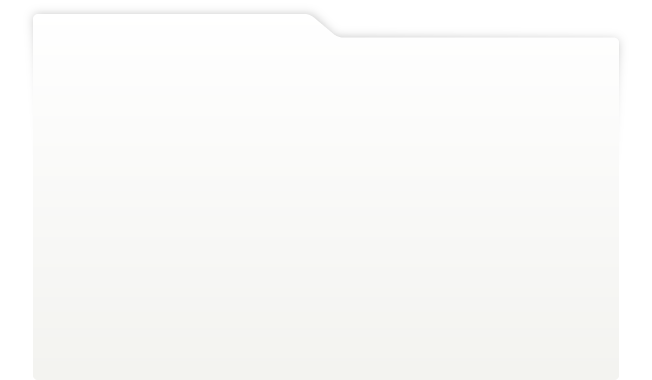
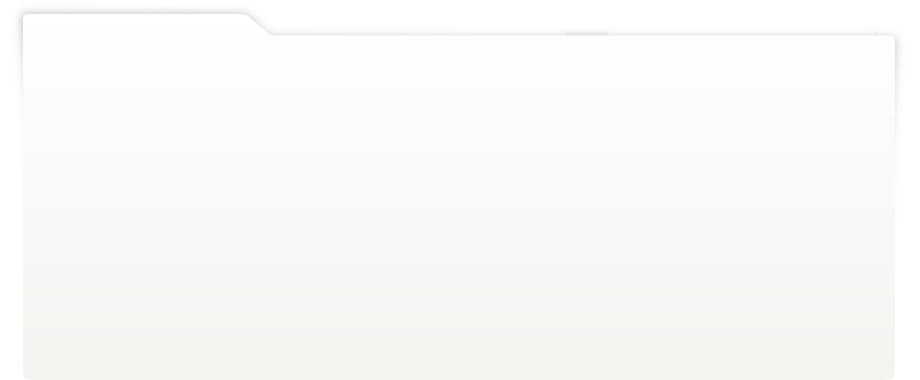
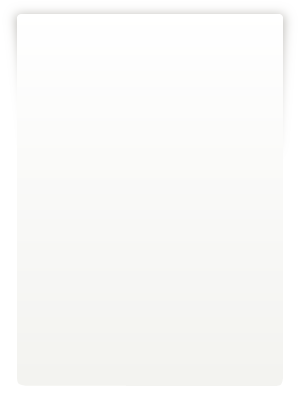
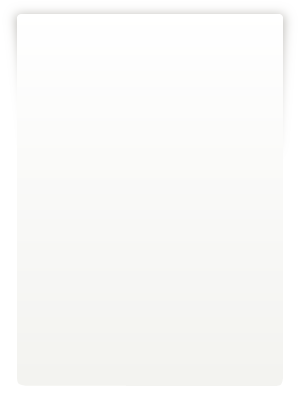
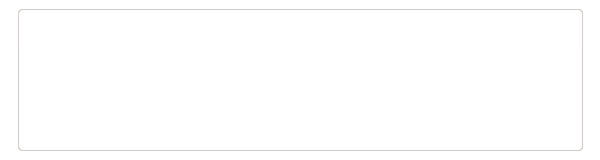
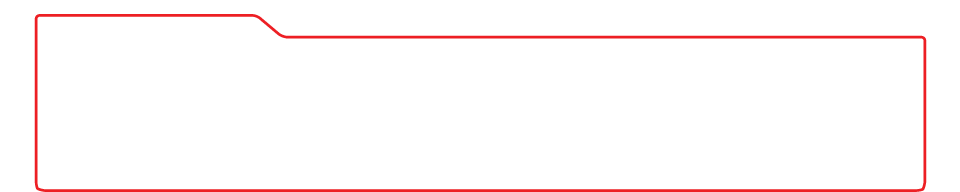
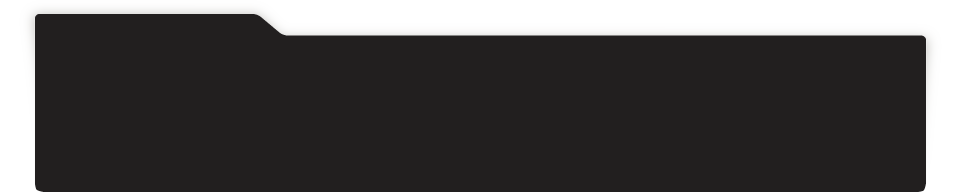
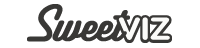
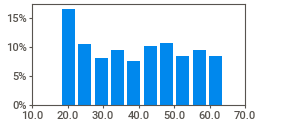
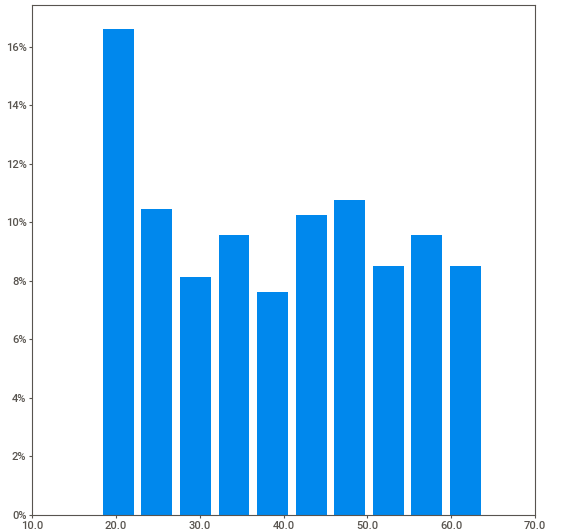
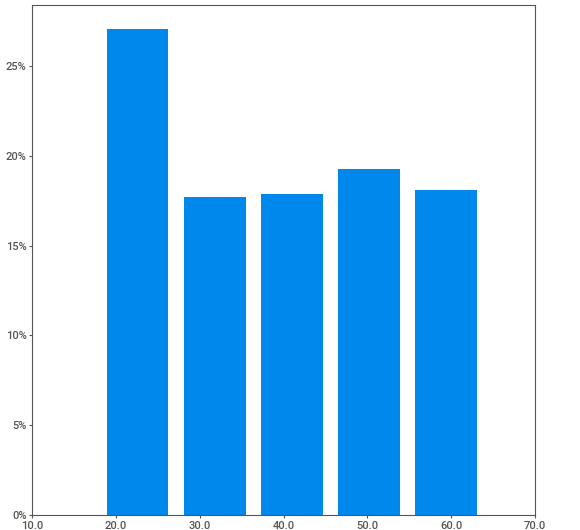
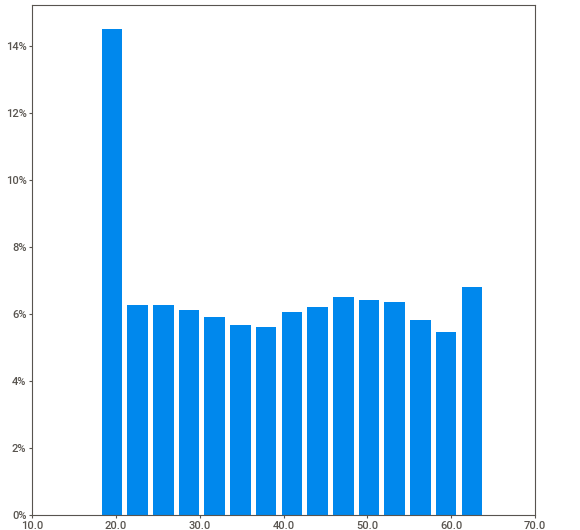
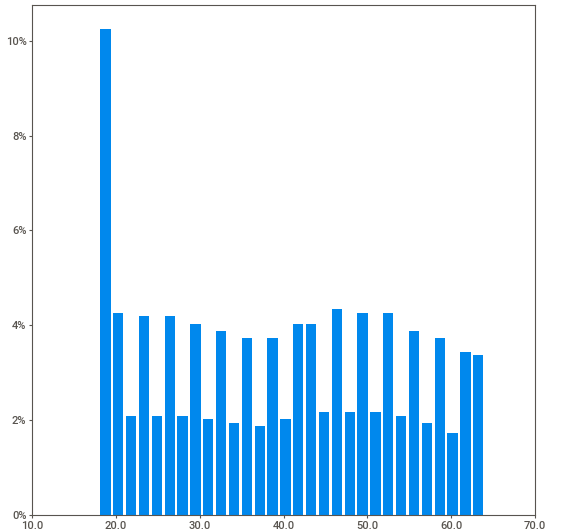
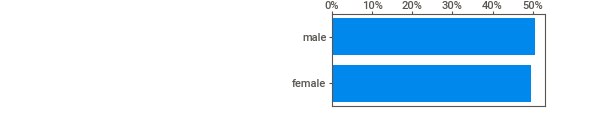
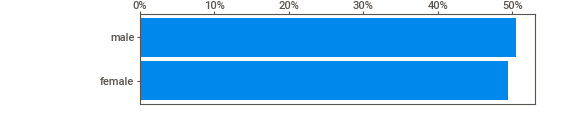
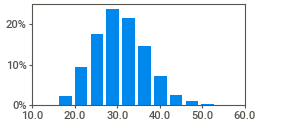
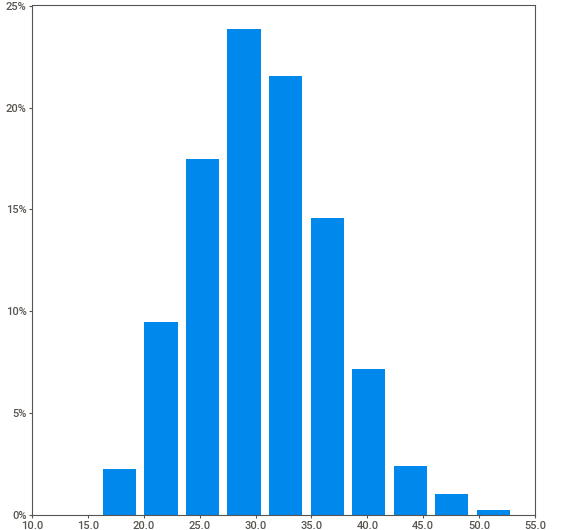
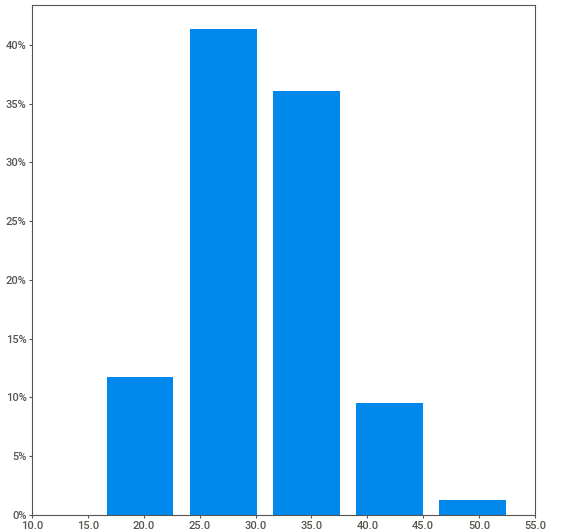
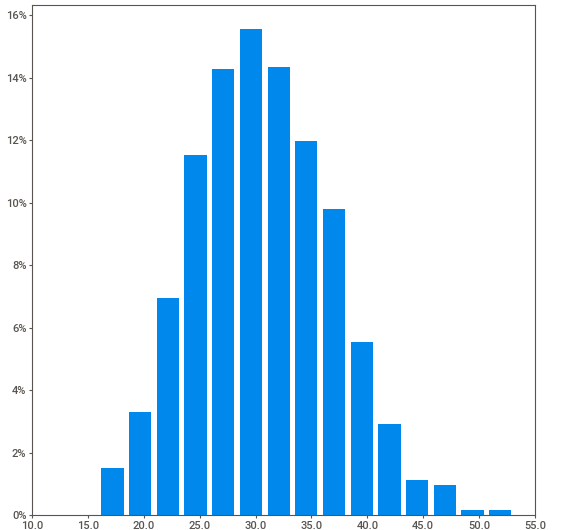
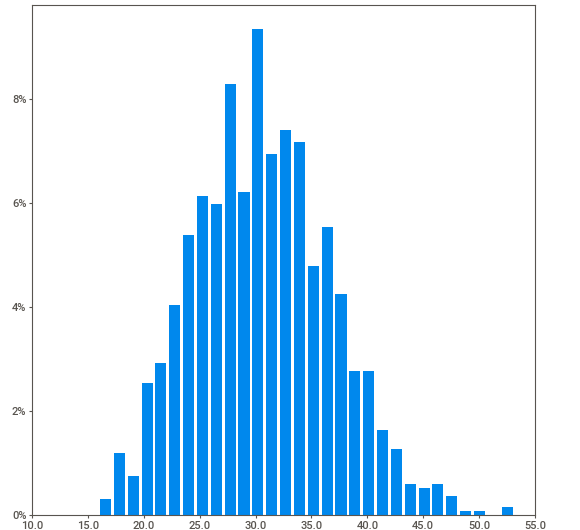
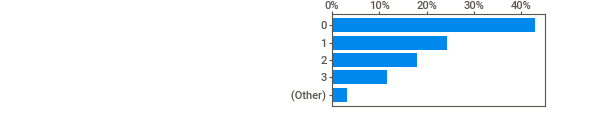
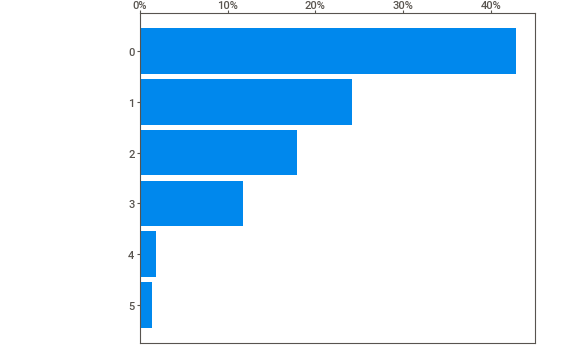
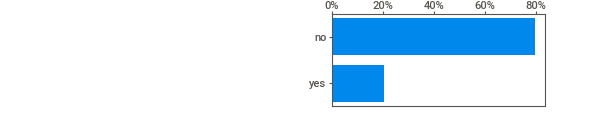
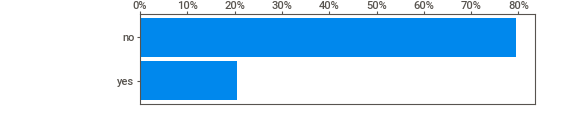
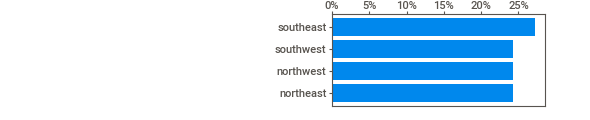
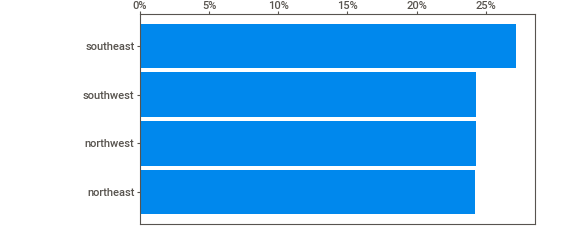
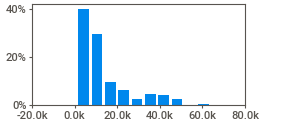
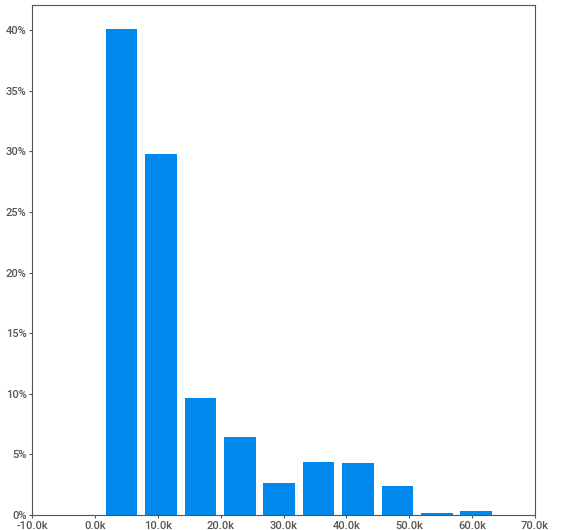
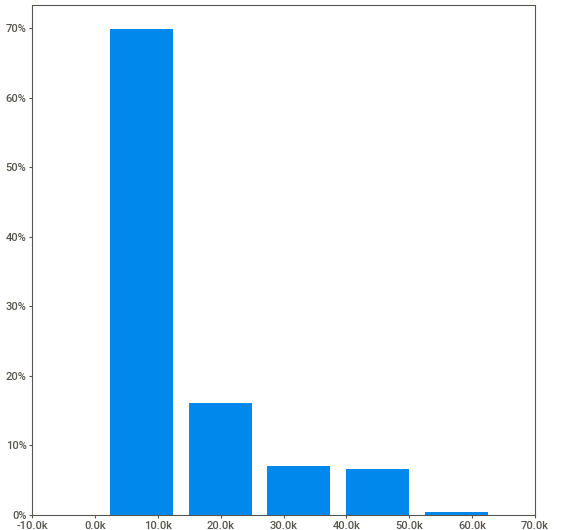
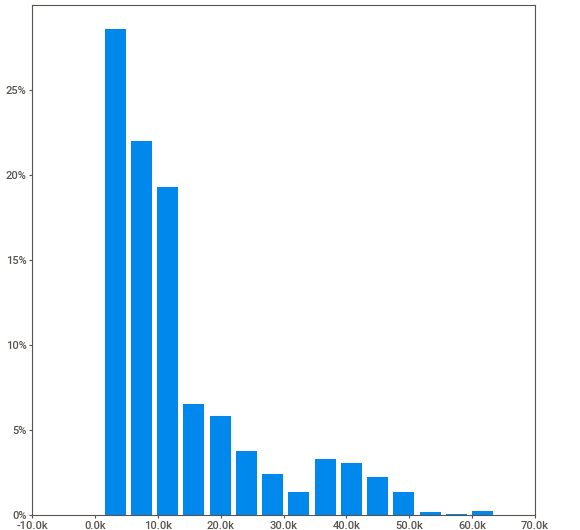
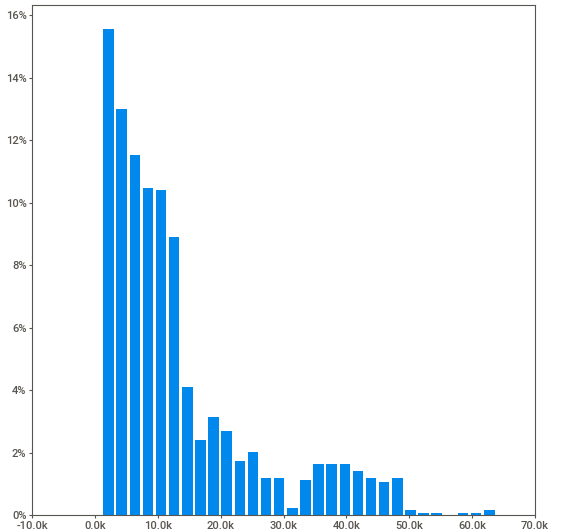
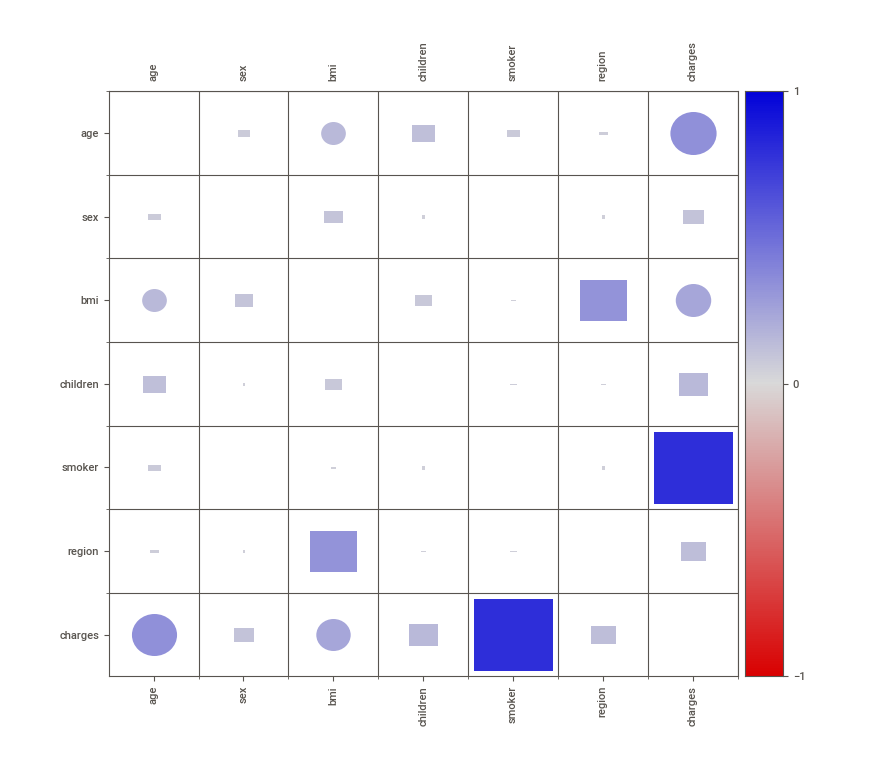
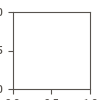

In [306]:
sv.analyze(data).show_notebook()

**this is not necessary**

# REGULAR EDA

In [307]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


will output some info about the dataset

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


as we can see we don't have null values so we can continue with some descrptive analysis

In [309]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


we will check to see if we have duplicates in our dataset

In [310]:
data.duplicated().any().sum()

1

as we can see we have duplicates so we will drop the duplicate

In [311]:
data = data.drop_duplicates()

#Some Visualizations

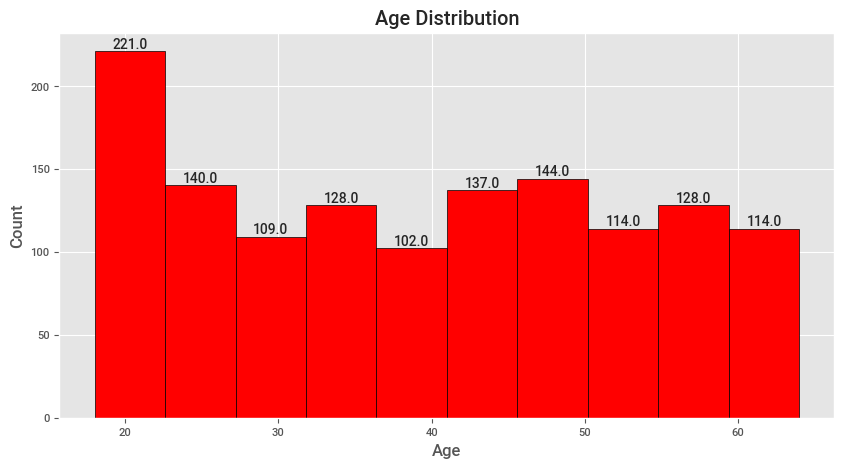

In [312]:
with plt.style.context('ggplot'):
 plt.figure(figsize=(10,5))
 plt.grid(True)
 plt.title('Age Distribution')
 plt.xlabel('Age')
 plt.ylabel('Count')
 counts ,bins,patches  = plt.hist(data['age'],edgecolor='black',color = 'red')
 for count , patch in zip(counts,patches):
    plt.text(patch.get_x()+patch.get_width()/2,count,f'{count}',ha='center',va='bottom',fontsize=10)
 plt.show()

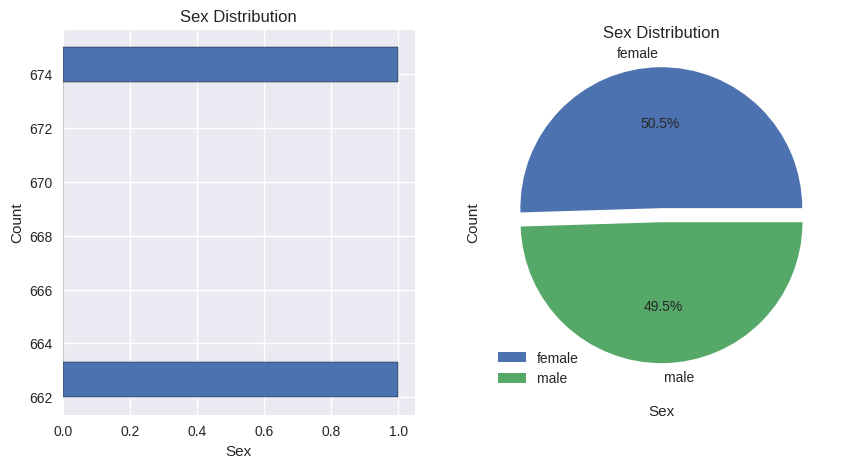

In [313]:
with plt.style.context('seaborn-v0_8'):
 fig , ax = plt.subplots(1,2,figsize=(10,5))
 plt.grid(True)

 ax[0].set_title("Sex Distribution")
 ax[0].set_xlabel('Sex')
 ax[0].set_ylabel('Count')
 ax[0].hist(data['sex'].value_counts(),edgecolor='black',orientation='horizontal')


 ax[1].set_title("Sex Distribution")
 ax[1].set_xlabel('Sex')
 ax[1].set_ylabel('Count')
 ax[1].pie(data['sex'].value_counts(),explode=[0.1,0],labels= data['sex'].unique(), autopct= '%1.1f%%')
 plt.legend()

 plt.show()




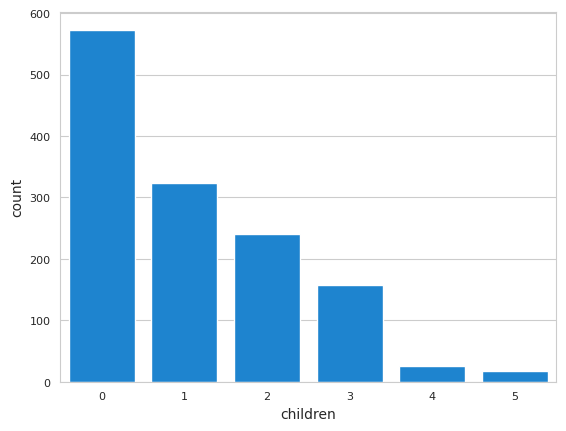

In [314]:
sns.set_style('whitegrid')
sns.countplot(x=data['children']  )
plt.show()

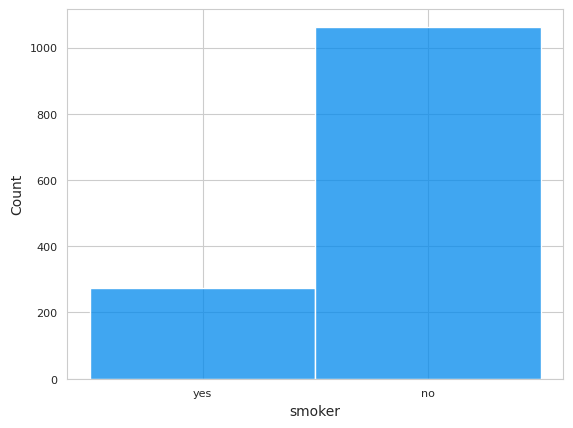

In [315]:
sns.set_style('whitegrid')
sns.histplot(x=data['smoker']  )
plt.show()

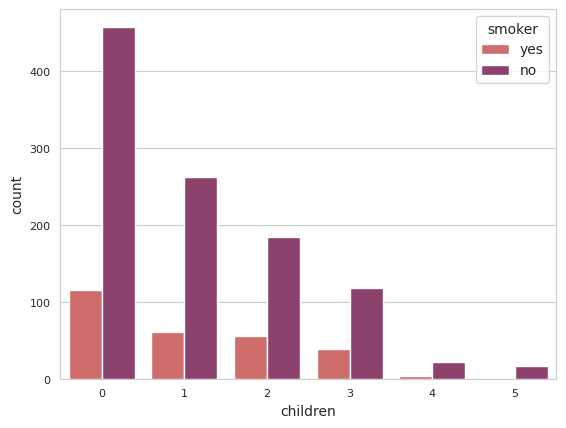

In [316]:
sns.countplot(x=data['children'],hue=data['smoker'],palette='flare')
plt.show()

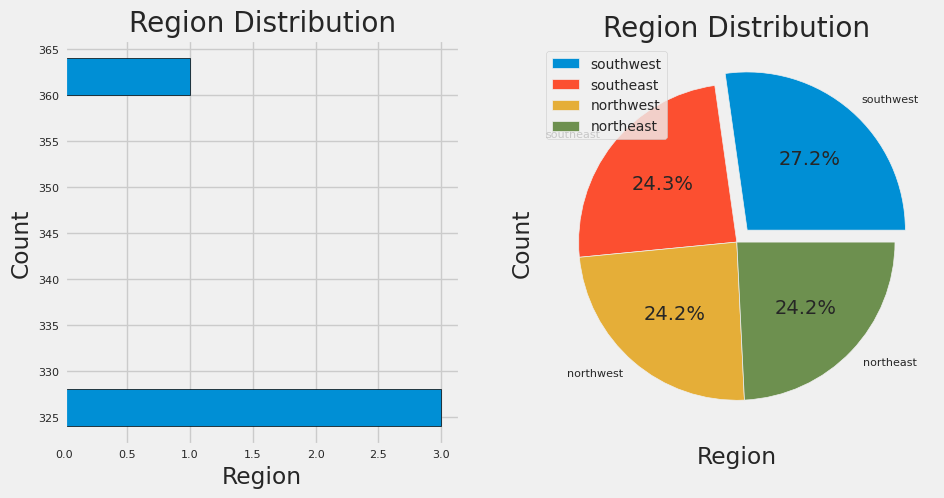

In [271]:
with plt.style.context('fivethirtyeight'):
   fig , ax = plt.subplots(1,2,figsize=(10,5))
   ax[0].set_title("Region Distribution")
   ax[0].set_xlabel('Region')
   ax[0].set_ylabel('Count')
   ax[0].hist(data['region'].value_counts(),edgecolor='black',orientation='horizontal')

   ax[1].set_title("Region Distribution")
   ax[1].set_xlabel('Region')
   ax[1].set_ylabel('Count')
   #minimize label
   ax[1].pie(data['region'].value_counts(),explode=[0.1,0,0,0],labels= data['region'].unique() , autopct= '%1.1f%%')
   plt.legend(fontsize=10)

   plt.show()

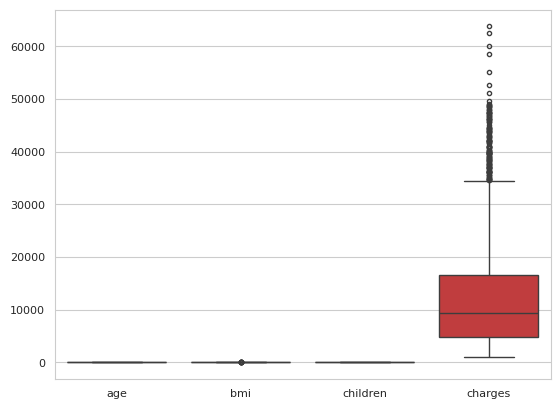

In [272]:
sns.boxplot(data)
plt.show()

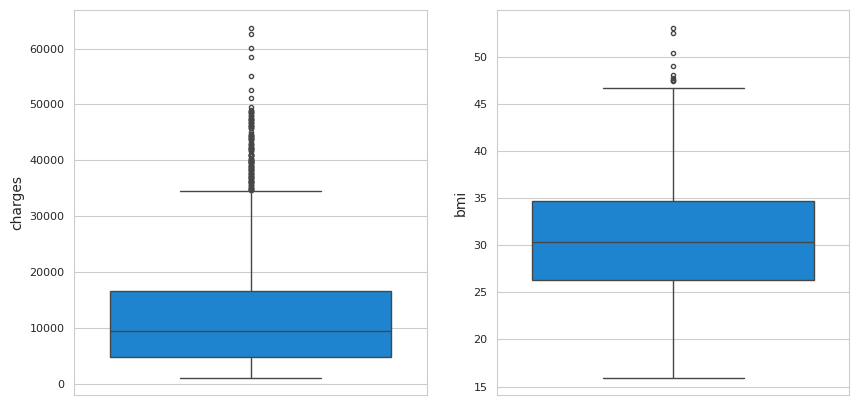

In [273]:
fig , ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data['charges'],ax=ax[0])
sns.boxplot(data['bmi'],ax=ax[1])
plt.show()

because we want to predict charges we will leave it as it is and  **we will focus on the outliers of the *bmi***




In [317]:
IQR = data['bmi'].quantile(0.75) - data['bmi'].quantile(0.25)
IQR

count = sum(data['bmi']> data['bmi'].quantile(0.75)+1.5*IQR)
print('outliers: ',count)

outliers:  9


In [323]:
print("Percentage: ",round(count/len(data),4),"%")

Percentage:  0.0067 %


because the percentage is < 1% we will delete it (we remove the outliers because it will not affect our dataset )

In [326]:
view_outliers_bmi = data[(data['bmi']>data['bmi'].quantile(0.75)+1.5*IQR)]
view_outliers_bmi

,age,sex,bmi,children,smoker,region,charges


In [327]:
data = data.drop(view_outliers_bmi.index)

In [328]:
data.shape

(1328, 7)

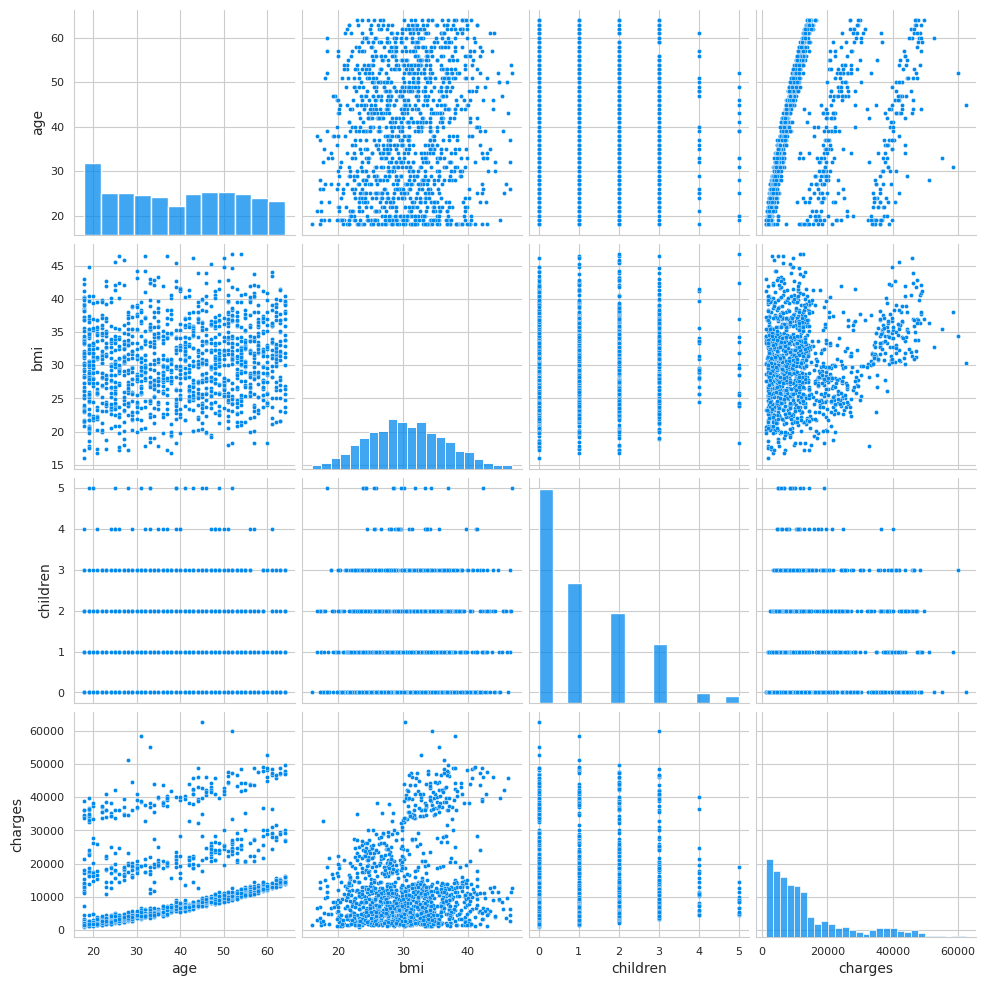

In [329]:
sns.pairplot(data)
plt.show()

# Preprocessing

In [330]:
for col in data.columns:
  print(col)



age
sex
bmi
children
smoker
region
charges


In [331]:
charges = data['charges']
data = data.drop('charges',axis=1)


In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

x_train , x_test , y_train , y_test = train_test_split(data,charges,test_size=0.2,random_state=42)

In [333]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1062, 6), (266, 6), (1062,), (266,))

we will scale our data that are numerical values

In [334]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train[['age','bmi','children']])
x_test_scaled = scaler.transform(x_test[['age','bmi','children']])

In [285]:
x_train

,age,sex,bmi,children,smoker,region
414,19,female,35.15,0,no,northwest
171,49,male,30.30,0,no,southwest
947,37,male,34.20,1,yes,northeast
1013,48,male,32.30,1,no,northwest
210,20,male,33.00,1,no,southwest
...,...,...,...,...,...,...
1104,37,male,29.80,0,no,southwest
1139,19,female,32.49,0,yes,northwest
1303,43,male,27.80,0,yes,southwest
867,57,male,43.70,1,no,southwest


we will use OneHotEncoder for the categorical values   [OneHotEncoder Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [286]:
onehot = OneHotEncoder(drop='first',sparse=False)
x_train_encoded = onehot.fit_transform(x_train[['sex','smoker','region']])
x_test_encoded = onehot.transform(x_test[['sex','smoker','region']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


we will update the old values `(x_train,y_train)` with the new & processed ones

In [287]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=['age','bmi','children'])
x_test_scaled = pd.DataFrame(x_test_scaled,columns=['age','bmi','children'])

# Get feature names
feature_names = onehot.get_feature_names_out(['sex', 'smoker', 'region'])

x_train_encoded = pd.DataFrame(x_train_encoded,columns=feature_names)
x_test_encoded = pd.DataFrame(x_test_encoded,columns=feature_names)

x_train = pd.concat([x_train_scaled,x_train_encoded],axis=1)
x_test = pd.concat([x_test_scaled,x_test_encoded],axis=1)

In [288]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.627740,0.0,0.0,0.0,1.0,0.0,0.0
1,0.673913,0.469087,0.0,1.0,0.0,0.0,0.0,1.0
2,0.413043,0.596663,0.2,1.0,1.0,0.0,0.0,0.0
3,0.652174,0.534511,0.2,1.0,0.0,1.0,0.0,0.0
4,0.043478,0.557409,0.2,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1057,0.413043,0.452731,0.0,1.0,0.0,0.0,0.0,1.0
1058,0.021739,0.540726,0.0,0.0,1.0,1.0,0.0,0.0
1059,0.543478,0.387308,0.0,1.0,1.0,0.0,0.0,1.0
1060,0.847826,0.907426,0.2,1.0,0.0,0.0,0.0,1.0


# Correlation Plot

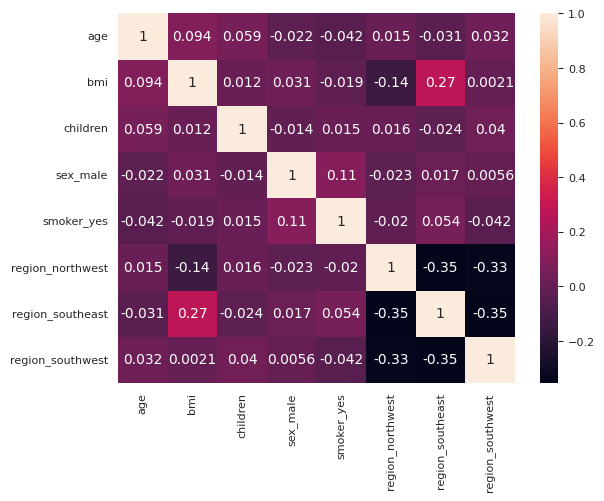

In [289]:
sns.heatmap(x_train.corr(),annot=True)
plt.show()

# MODELS BUILDING

we will do 4 models:
- Linear Regression
- Lasso
- Ridge
- RandomForestRegressor

In [290]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse , r2_score as r2


In [294]:
models = {'LinearRegression':LinearRegression(),'Lasso':Lasso(),'Ridge':Ridge(),'RandomForestRegressor':RandomForestRegressor()}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(name)
    print('MSE: ',round(mse(y_test,y_pred),2))
    print('R2: ',round(r2(y_test,y_pred),2))


LinearRegression
MSE:  35465549.24
R2:  0.74
Lasso
MSE:  35447754.05
R2:  0.74
Ridge
MSE:  35390912.31
R2:  0.75
RandomForestRegressor
MSE:  27069087.14
R2:  0.81


We will use the GridSearchCV to see if we can improve one of our models and find the better one

In [296]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'LinearRegression':{},
    'Lasso':{'alpha':[0.01,0.1,1,10]},
    'Ridge':{'alpha':[0.01,0.1,1,10]},
    'RandomForestRegressor':{'n_estimators':[400],'max_depth':[8],'min_samples_split':[5],'min_samples_leaf':[2],'max_features':['log2']}
}


grid_searches = {}
for name,model in models.items():
  print(name)
  grid_search = GridSearchCV(model,param_grid[name],cv=5,scoring='r2')
  grid_search.fit(x_train,y_train)
  grid_searches[name] = grid_search

LinearRegression
Lasso
Ridge
RandomForestRegressor


In [299]:
for name,grid_search in grid_searches.items():
    print(name)
    print('Best Parameters: ',grid_search.best_params_)
    print('Best Score: ',grid_search.best_score_)

LinearRegression
Best Parameters:  {}
Best Score:  0.7418450203161807
Lasso
Best Parameters:  {'alpha': 10}
Best Score:  0.7419289980293262
Ridge
Best Parameters:  {'alpha': 1}
Best Score:  0.741910976112879
RandomForestRegressor
Best Parameters:  {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}
Best Score:  0.8491947454201508


#Conclusion

As we can see from above the best model for this dataset was the RandomForestRegressor with accucracy:  
- $\mathrm{R}^{2}$ = 85%